# Radiative Boundary Conditions

## Scalar Waves

$$
\begin{align}
  \dot{u}
  &=\rho, \\
  \dot{\rho}
  &=\partial_kv_k, \\
  \dot{v_k}
  &=\partial_k \rho.
\end{align}
$$

where $v_k:=\partial_ku$.

In [1]:
U = {u, \[Rho], vx, vy, vz}

{u, ρ, vx, vy, vz}

#### Replacement Rules

2     2     2          2     2     2
{sx  + sy  + sz  -> 1, -sx  - sy  - sz  -> -1, sx vx + sy vy + sz vz -> sv, 
 
>   -(sx vx) - sy vy - sz vz -> -sv}
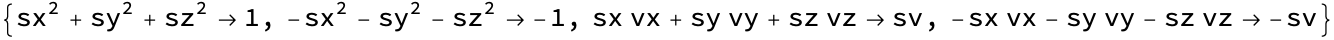

In [2]:
cnd = {
    sx^2+sy^2+sz^2 -> 1,
    -sx^2-sy^2-sz^2 -> -1,
    sx vx+sy vy+sz vz -> sv,
    -sx vx-sy vy-sz vz -> -sv
}

### Characteristic matrix with respect to normal $s_i$: $A^{\mathbf{s}\alpha}{}_\beta$

0     0     0     0     0

0     0     -sx   -sy   -sz

0     -sx   0     0     0

0     -sy   0     0     0

0     -sz   0     0     0
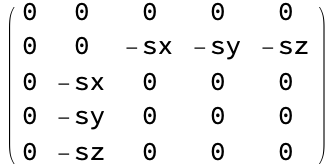

In [3]:
As = {
    {0, 0, 0, 0, 0},
    {0, 0, -sx, -sy, -sz},
    {0, -sx, 0, 0, 0},
    {0, -sy, 0, 0, 0},
    {0, -sz, 0, 0, 0}
};
As//MatrixForm

0

-(sx vx) - sy vy - sz vz

-(sx ρ)

-(sy ρ)

-(sz ρ)
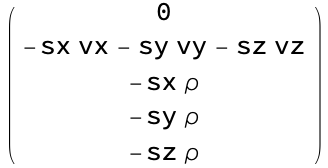

In [5]:
As.U//MatrixForm

### Characteristic Fields

$$U^{\hat{\alpha}}=e^{\hat{\alpha}}{}_\beta U^{\beta}$$

where $e^{\hat{\alpha}}{}_\beta$ is the **LEFT** eigenvectors of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$e^{\hat{\alpha}}{}_\mu A^{\mathbf{s}\mu}{}_\beta=v^{(\hat{\alpha})}e^{\hat{\alpha}}{}_\beta$$

and $e_{\hat{\alpha}}{}^{\beta}$ is the **RIGHT** eigenvector of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$A^{\mathbf{s}\alpha}{}_\mu e_{\hat{\beta}}{}^{\mu} =v_{(\hat{\beta})}e_{\hat{\beta}}{}^{\alpha}$$

In [6]:
eValue = Eigenvalues[Transpose[As]]/.cnd

{0, 0, 0, -1, 1}

$$
\begin{align}
  \begin{array}{lll}
    U^{\hat{0}}    &=u, \quad                          &\text{speed} \quad 0, \\
    U^{\hat{1}\pm} &=\rho\mp\mathbf{s}\cdot\mathbf{v},         &\text{speed} \quad \pm 1, \\
    U^{\hat{2}}    &=\mathbf{v}-\mathbf{s}(\mathbf{s}\cdot\mathbf{v}), &\text{speed} \quad 0.
  \end{array}
\end{align}
$$

In [14]:
eLeftVector = {
    {1, 0, 0, 0, 0},
    {0, 1, -sx, -sy, -sz},
    {0, 1, sx, sy, sz},
    {0, 0, 1-sx sx, -sx sy, -sx sz},
    {0, 0, -sy sx, 1-sy sy, -sy sz},
    {0, 0, -sz sx, -sz sy, 1-sz sz}
};

In [15]:
eLeftVector[[1]].As - eLeftVector[[1]]eValue[[1]]

{0, 0, 0, 0, 0}

In [9]:
eLeftVector[[2]].As - eLeftVector[[2]]eValue[[5]]/.cnd

{0, 0, 0, 0, 0}

In [10]:
eLeftVector[[3]].As - eLeftVector[[3]]eValue[[4]]/.cnd

{0, 0, 0, 0, 0}

In [11]:
Table[(eLeftVector[[i]].As - eLeftVector[[i]]eValue[[1]]//Simplify)/.cnd, {i,4,6}]

{{0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}}

u


-sv + ρ


sv + ρ

       2
(1 - sx ) vx - sx sy vy - sx sz vz

                     2
-(sx sy vx) + (1 - sy ) vy - sy sz vz

                                2
-(sx sz vx) - sy sz vy + (1 - sz ) vz
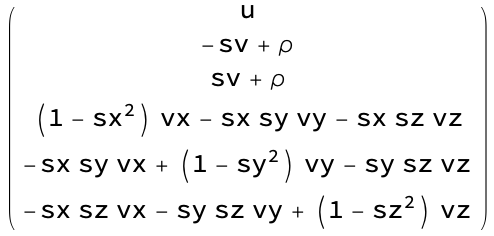

In [12]:
(eLeftVector.U)/.cnd//MatrixForm

sz                   sy                               1   sx  sy
{{0, 0, -(--), 0, 1}, {0, 0, -(--), 1, 0}, {1, 0, 0, 0, 0}, {0, --, --, --, 1}, 
          sx                   sx                               sz  sz  sz
 
          1    sx  sy
>   {0, -(--), --, --, 1}}
          sz   sz  sz
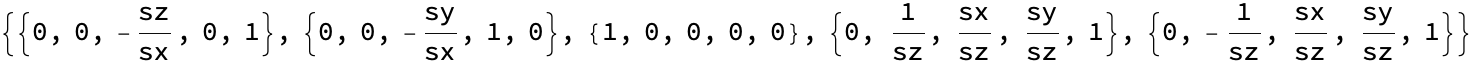

In [21]:
Eigenvectors[Transpose[As]]/.cnd

sz                   sy                               1   sx  sy
{{0, 0, -(--), 0, 1}, {0, 0, -(--), 1, 0}, {1, 0, 0, 0, 0}, {0, --, --, --, 1}, 
          sx                   sx                               sz  sz  sz
 
          1    sx  sy
>   {0, -(--), --, --, 1}}
          sz   sz  sz
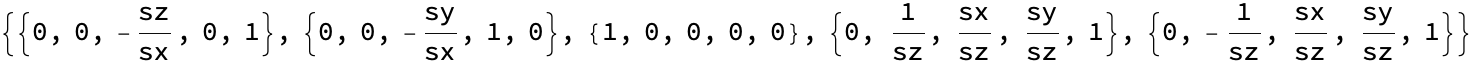

In [20]:
Eigenvectors[As]/.cnd

### Radiative Boundary Condition

$$U^{\hat{1}-}=0$$